In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('../../data/raw/nb_data/6. Nan_removed/gurgaon_properties_missing_value_imputation.csv')

In [3]:
df.shape

(3554, 18)

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,vatika gurgaon,sector 83,1.05,7000.0,3,3,3,3.0,Relatively New,1618.0,0,0,1,0,0,2,79
1,flat,m3m the marina,sector 68,1.45,9615.0,3,2,3+,9.0,New Property,1365.0,0,0,0,0,0,2,0
2,house,bptp astaire gardens,sector 70a,1.18,8138.0,3,3,3+,2.0,Relatively New,1611.0,0,0,0,0,1,1,153
3,flat,cghs airport apartment,sector 47,1.65,7857.0,3,3,3,1.0,Old Property,1906.0,0,0,0,0,1,1,136
4,flat,m3m woodshire,sector 107,1.65,5961.0,4,5,3+,12.0,Relatively New,2505.0,0,1,0,0,0,2,21


In [5]:
latlong = pd.read_csv('../../data/raw/nb_data/8. analytics-module/latlong.csv')

In [6]:
latlong.head(2)

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"


In [7]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [8]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [9]:
latlong.head(2)

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320


In [10]:
new_df = df.merge(latlong, on='sector')

In [11]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [12]:
new_df[['sector', 'price','price_per_sqft','built_up_area','latitude','longitude']].dtypes

sector             object
price             float64
price_per_sqft    float64
built_up_area     float64
latitude          float64
longitude         float64
dtype: object

In [13]:
df2 = new_df[['sector', 'price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']].copy()

In [14]:
df2.head(2)

,sector,price,price_per_sqft,built_up_area,latitude,longitude
0,sector 83,1.05,7000.0,1618.0,28.3986,76.9647
1,sector 68,1.45,9615.0,1365.0,28.3853,77.0484


In [15]:
group_df = df2.groupby('sector').mean()[['price','price_per_sqft','built_up_area','latitude','longitude']]

In [16]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
sector 103,1.495000,7445.785714,1865.428571,28.4949,76.9845
...,...,...,...,...,...
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326
sector 95,0.480545,5602.509091,995.981818,28.4172,76.9081


In [17]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [18]:
new_df.to_csv('../../app/datasets/data_viz1.csv',index=False)

In [19]:
df1 = pd.read_csv('../../data/raw/nb_data/3. merged_data/gurgaon_properties.csv')

In [20]:
df1.head(2)

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 83 Gurgaon,flat,vatika gurgaon,1.05,7000.0,1500.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3,3,3,store room,"Sector 83 Gurgaon, Gurgaon, Haryana",3.0,South-West,1 to 5 Year Old,"['Huda Metro Station (Gurugram)', 'Sapphire 83...",Located in the popular residential address of ...,NaN,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'M...","['Green Area5 out of 5', 'Construction4.5 out ..."
1,3 BHK Flat in Sector 68 Gurgaon,flat,m3m the marina,1.45,9615.0,1508.0,Super Built up area 1508(140.1 sq.m.),3,2,3+,not available,"Sector 68 Gurgaon, Gurgaon, Haryana",9.0,NaN,0 to 1 Year Old,"['Airia Mall', 'Southern Peripheral Road', 'So...",We are the proud owners of this 3 bhk apartmen...,[],NaN,"['Green Area4 out of 5', 'Construction4 out of..."


In [21]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [22]:
wordcloud_df.head()

,features,sector
0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'M...",sector 83
1,NaN,sector 68
2,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 70a
3,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 47
4,"['Intercom Facility', 'Lift(s)', 'Maintenance ...",sector 107


In [23]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [24]:
main

['Feng Shui / Vaastu Compliant',
 'Lift(s)',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Separate entry for servant room',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Water softening plant',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Centrally Air Conditioned',
 'Water purifier',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'Recently Renovated',
 'Piped-gas',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Internet/wi-fi connectivity',
 'Airy Rooms',
 'Spacious Interiors',
 'Fitness Centre / GYM',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facilit

In [25]:
from wordcloud import WordCloud

In [26]:
feature_text = ' '.join(main)

In [27]:
import joblib
joblib.dump(feature_text, '../../app/datasets/feature_text.joblib')

['../../app/datasets/feature_text.joblib']

In [28]:
feature_text

'Feng Shui / Vaastu Compliant Lift(s) Maintenance Staff False Ceiling Lighting Separate entry for servant room Visitor Parking Swimming Pool Park Security Personnel Shopping Centre Fitness Centre / GYM Rain Water Harvesting Club house / Community Center Water softening plant Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace Centrally Air Conditioned Water purifier High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room Recently Renovated Piped-gas Visitor Parking Swimming Pool Park Security Personnel Natural Light Internet/wi-fi connectivity Airy Rooms Spacious Interiors Fitness Centre / GYM Waste Disposal Rain Water Harvesting Club house / Community Center Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace Intercom Facility Lift(s) Centrally Air Conditioned Water purifier High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Bank Attached Property Recently Renovat

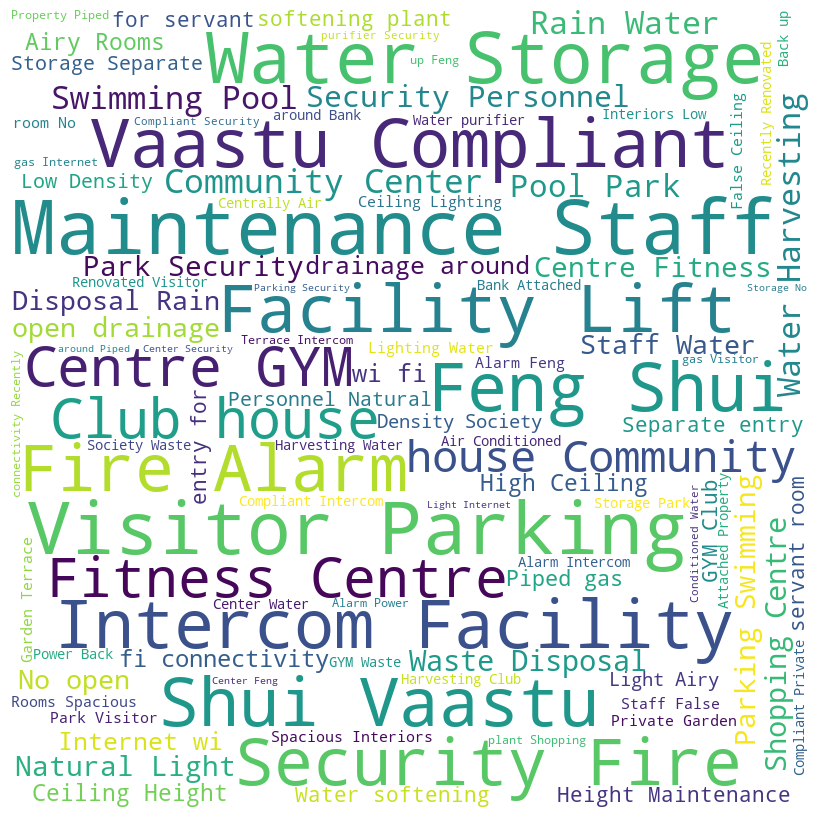

In [29]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [30]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [31]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [32]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [33]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


<Axes: xlabel='price', ylabel='Density'>

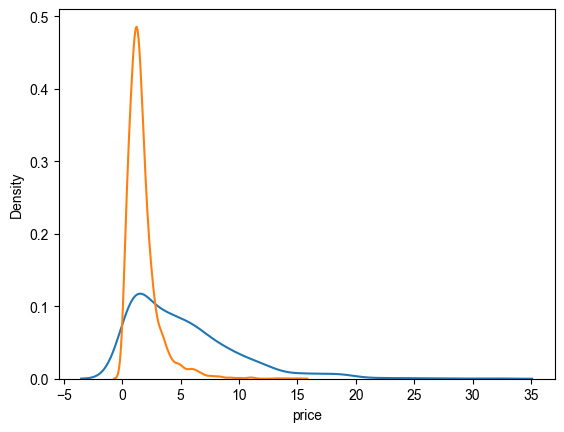

In [37]:
sns.kdeplot(df[df['property_type'] == 'house']['price'])
sns.kdeplot(df[df['property_type'] == 'flat']['price'])

In [35]:
new_df['sector'].unique().tolist().insert(0,'overall')